In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from akita_utils.format_io import h5_to_df
from scipy import stats

In [2]:
import sys
sys.path.insert(0, "/home1/smaruj/akitaX1-analyses/utils/")
from utils import (average_stat_over_targets, average_stat_over_backgrounds)

2024-01-22 17:39:51.565058: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-22 17:39:51.565114: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-22 17:39:51.649451: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-22 17:39:51.704376: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-22 17:39:53.565454: W tensorflow/compiler/tf2

In [ ]:
# python collect_jobs_and_clean.py /scratch2/smaruj/disruption_by_permutation_rc_m0 -g -l -n

In [3]:
# stat metric the analysis is based on
stat_of_analysis_interest = "SCD"

In [4]:
# reading h5 files to dataframes
df_m0 = h5_to_df("/project/fudenber_735/akitaX1_analyses_data/genomic_disruption_experiment/disruption_by_permutation/model_0.h5", ["SCD", "INS-16", "INS-64"], average=False)
df_rc_m0 = h5_to_df("/project/fudenber_735/akitaX1_analyses_data/genomic_disruption_experiment/reverse_compliment/model_0_rc.h5", ["SCD", "INS-16", "INS-64"], average=False) 

In [5]:
m0 = df_m0[[f"{stat_of_analysis_interest}_h1_m0_t0", 
            f"{stat_of_analysis_interest}_h1_m0_t1", 
            f"{stat_of_analysis_interest}_h1_m0_t2", 
            f"{stat_of_analysis_interest}_h1_m0_t3", 
            f"{stat_of_analysis_interest}_h1_m0_t4", 
            f"{stat_of_analysis_interest}_h1_m0_t5"]].mean(axis=1)

rc_m0 = df_rc_m0[[f"{stat_of_analysis_interest}_h1_m0_t0", 
                  f"{stat_of_analysis_interest}_h1_m0_t1", 
                  f"{stat_of_analysis_interest}_h1_m0_t2", 
                  f"{stat_of_analysis_interest}_h1_m0_t3", 
                  f"{stat_of_analysis_interest}_h1_m0_t4", 
                  f"{stat_of_analysis_interest}_h1_m0_t5"]].mean(axis=1)

## Disruption scores for specific sites are not strand-sensitive

Text(0, 0.5, 'ave SCD, random complement')

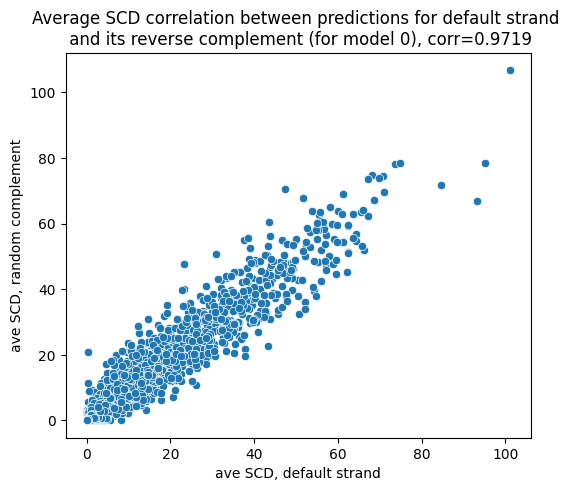

In [6]:
plt.figure(figsize=(6,5))
sn.scatterplot(x=m0, y=rc_m0)
rc_corr = round(stats.pearsonr(m0, rc_m0).statistic, 4)
plt.title(f"Average {stat_of_analysis_interest} correlation between predictions for default strand \n and its reverse complement (for model 0), corr={rc_corr}")
plt.xlabel(f"ave {stat_of_analysis_interest}, default strand")
plt.ylabel(f"ave {stat_of_analysis_interest}, random complement")